# Junior Colloquium

## Plotting maps with python
**Julius Busecke** *jbusecke@princeton.edu*



## Goals

By the end of this session you will know the basics of:

- plotting 2D data with [numpy](https://numpy.org/)/[matplotlib](https://matplotlib.org)

- selecting and plotting data with [xarray](http://xarray.pydata.org/)

- creating publication quality maps with either method using [cartopy](https://scitools.org.uk/cartopy/)

## Plotting vs. Mapping - What is the difference?

Mapping is a special case of a regular plot which usually involves some of these elements:
- A map projection to transform data from the spehrical shape of the earth to screen/paper
- Additional geospatial features like coastlines, rivers, country boundaries etc.

## What is a map projection?

The fundamental problem with vizualizing: 

Our medium of presentation (paper/screen) is flat ...

![paper_screen](https://raw.githubusercontent.com/SciTools/cartopy-tutorial/master/static/flat_medium.jpg)

And earth isn't!

![orange_peel](https://raw.githubusercontent.com/SciTools/cartopy-tutorial/master/static/orange_peel.jpg)

## Chosing your map projection

Be careful to chose your projection based on your scientific needs. 

**No projection is perfect and each one will distort some aspect of the data**

To make a decision about which projection to use, check out the excellent and very detailed [tutorial](https://github.com/SciTools/cartopy-tutorial) by [Phil Elson](https://github.com/pelson) and [Wikipedia](https://en.wikipedia.org/wiki/Map_projection)

## Instead of going through all the theory, lets look at some examples

## 2D plotting with numpy/matplotlib (the hard way)

We start, as usual, by importing our modules 

In [1]:
# import packages needed for the lesson
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# plots show in the notebook
%matplotlib inline  

# additional configuration (optional)
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

Lets now create an example dataset using numpy

In [2]:
# define a regularly spaced vector of longitudes
lon = np.linspace(-80, 80, 25)
# Same for latitudes
lat = np.linspace(30, 70, 25)
# we need to create a 2d array of longitudes and latitudes to create 2D data
lon2d, lat2d = np.meshgrid(lon, lat) 

# finally we create some dummy data 
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)


Now we plot the data as filled contour

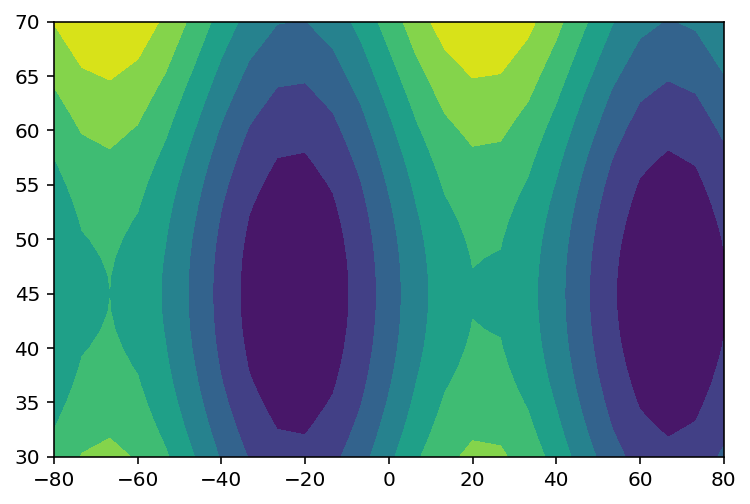

In [3]:
plt.contourf(lon, lat, data) #this is plotting with matplotlib!
# Note how you have to pass the longitude, 
# check out what happens when you just do
#plt.contourf(data)

Ok that was easy enough, but lets actually add some labels so a viewer would know what they are looking at.

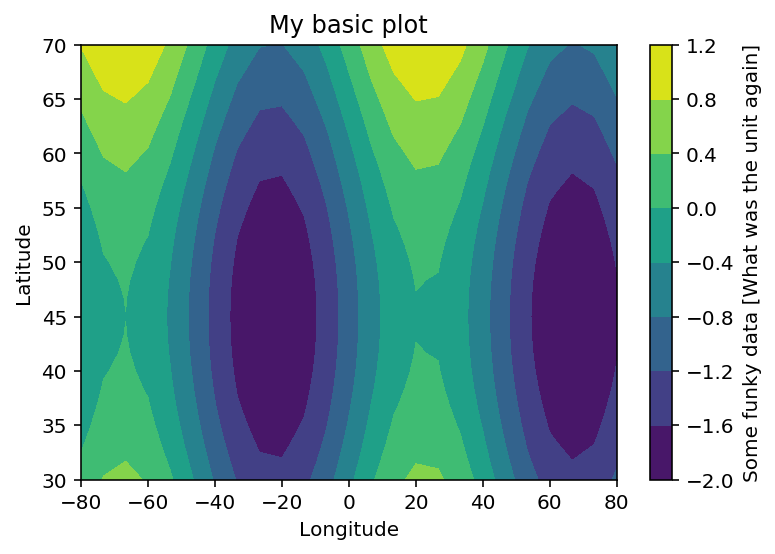

In [4]:
plt.contourf(lon, lat, data)
plt.title('My basic plot')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.colorbar(label='Some funky data [What was the unit again]') 

Matplotlib has several methods of plotting 2d data:

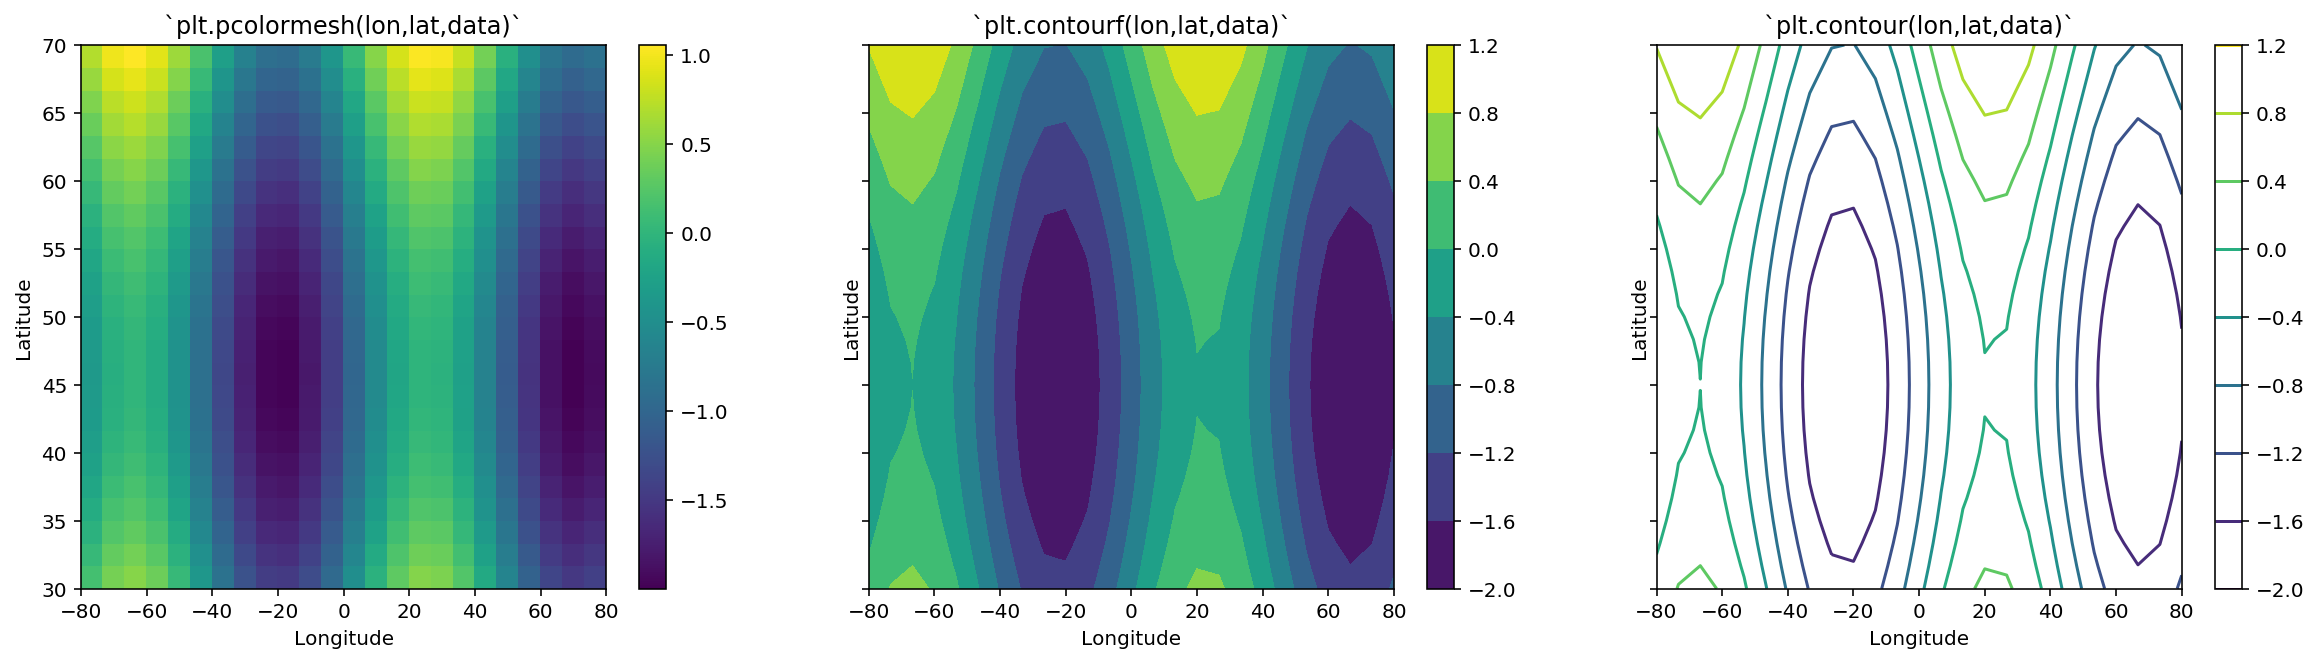

In [5]:
# this is a more involved way of plotting... just try it out in a single plot by 
# copying the title of the figure and pasting it above!

fig, axarr = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=[20,5])
for ax,method in zip(axarr, ['pcolormesh', 'contourf', 'contour']):
    func = getattr(ax, method)
    h = func(lon, lat, data)
    ax.set_title('`plt.%s(lon,lat,data)`' %method)
    ax.set_ylabel('Latitude')
    ax.set_xlabel('Longitude')
    plt.colorbar(h, ax=ax)

Try them out yourself in the cell above!

## SHOW ME THE MAPS ALREADY!

Now that we have a basic understanding we can move on to the mapping!

In [6]:
# we need to import cartopy
import cartopy.crs as ccrs

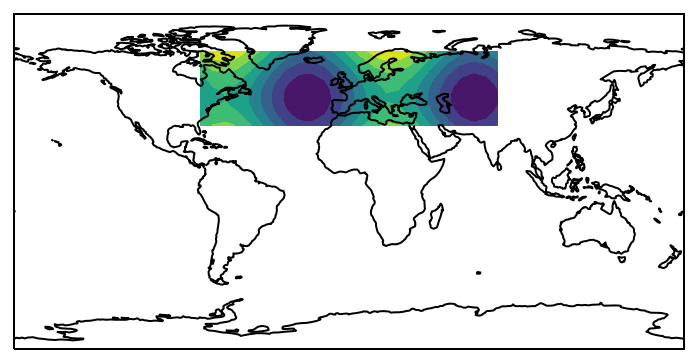

In [7]:
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.contourf(lon, lat, data)

# optional (Comment the lines with a leading # and see what changes)
ax.set_global() # zoom out as far as possible
ax.coastlines() # plot coastlines
#ax.gridlines()

Note the changes to the simple plotting before:

```python
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.contourf(lon, lat, data)

ax.set_global() # zoom out as far as possible
ax.coastlines() # plot coastlines
```

- We need to manually create an axis (matplotlib would do that automatially for us before)
- We need to pass a `projection=...` keyword to the axis.
- We *can* very easily plot coastlines and gridlines, which give a better context for the data than before and also show the full globe.

But thats it , we can now change the projection to something fancier...

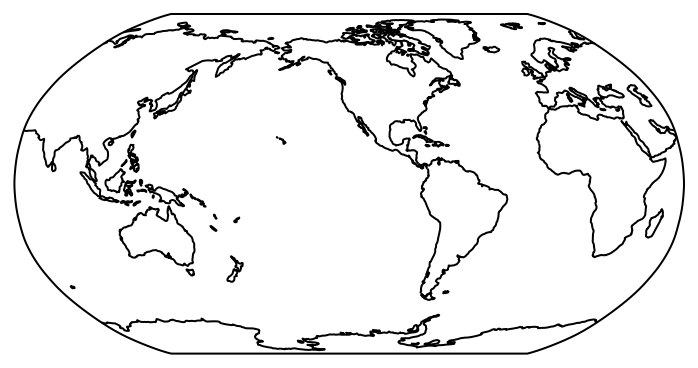

In [8]:
projection = ccrs.Robinson(-120)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

Hmmm something went wrong? 

We forgot to pass a `transform=...` argument to the plot command. This is necessary to 'warp' the data into the new projection!

Lets try this again...

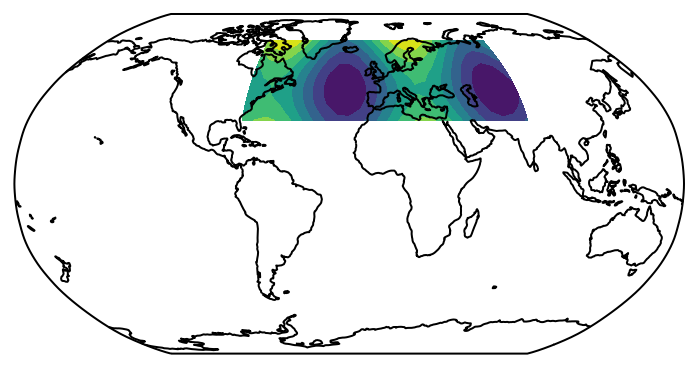

In [9]:
projection = ccrs.Robinson(-20) #this is the central longitude for the projection! Try to change it
#projection = ccrs.InterruptedGoodeHomolosine() # Comment the line above and uncomment this for another projection
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

### Horray! Our first proper map. 🎉

Now we can get really fancy and add "features"

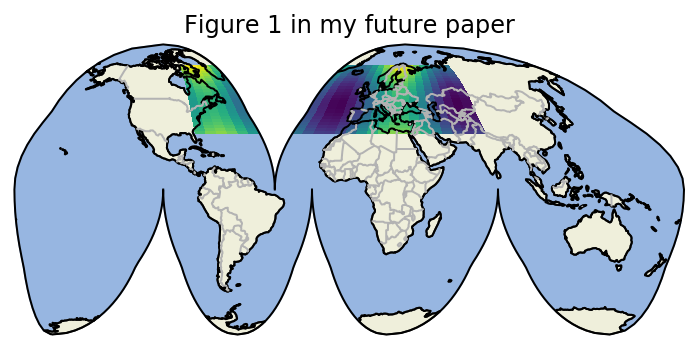

In [10]:
# import the features module from cartopy
import cartopy.feature as cfeature  
projection = ccrs.InterruptedGoodeHomolosine() # Comment the line above and uncomment this for another projection
ax = plt.axes(projection=projection)
ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree())
ax.set_global(); ax.coastlines()
# there are many color and fill options in each one of these functions so you can customize your map style
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='0.2')
ax.add_feature(cfeature.BORDERS, edgecolor='0.7')
ax.set_title('Figure 1 in my future paper')
# dont forget to save your figure!
plt.gcf().savefig('final_map_1.png')

![final map](final_map_1.png)

If that would be some real data, this plot could go straight into a publication!

### Quick recap:

- Choose a map projection that fits your need (e.g. do you need to show the whole globe or just the US?)
- You can plot maps in the same way (and with the same options) as regular plots. You only need to:
    1. Create an axis and pass a `projection=...` argument
    2. Pass an additional `transform=...` argument to your plotting functions.

## 2D plotting with xarray (my personal workflow)

numpy and matplotlib build the foundation for our scientific plotting, but there are other packages out there that make it a lot easier and more fun to select, manipulate and plot data:

- [xarray](http://xarray.pydata.org/)(for gridded datasets, usually `.nc` or `netcdf` files)
- [pandas](https://pandas.pydata.org/)(for irregularly spaced datasets, like spreadsheets)

I will focus on xarray since I personally work mostly with gridded model data, but pandas works very similarly to xarray!

### Step 1: Load a dataset. 

Instead of creating out own dataset, we will use a real world example
    
For simiplicity we will use the example dataset which comes with xarray.


In [11]:
ds = xr.tutorial.open_dataset('air_temperature').air.load()

#If you are loading a netcdf file 
#just do `ds = xr.open_dataset(filepath_to_nc_file)`

The first thing to do is always to inspect your dataset!

In [12]:
# this will print the full dataarray (xarrays version of a netcdf)
ds

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.199

In [13]:
ds.dims
# ds.coords
# ds.attrs

('time', 'lat', 'lon')

From just looking at the metadata, we know:

1. The data is 6 hourly air surface data

2. The units are deg K 

3. The data has 3 dimensions - Longitude, Latitude, and Time

In order to plot it we need to reduce one of the dimensions.

Here we chose to reduce time by selecting one particular timestep of the array by using the `.isel(...)` attribute

In [14]:
da_2d = ds.isel(time=10) # select the 10th timestep
da_2d.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-03T12:00:00

### xarray is 'label-aware': 

You can choose data based on labels by using `.sel()` instead of `.isel()`:

![netcdf_example](https://desktop.arcgis.com/en/arcmap/10.3/tools/space-time-pattern-mining-toolbox/GUID-0FEECE1A-6B54-44B4-AE49-05E7EA849A8B-web.png)

In [15]:
da_2d = ds.sel(time='2013-01-01T18') # select the exact data and time
da_2d.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01T18:00:00

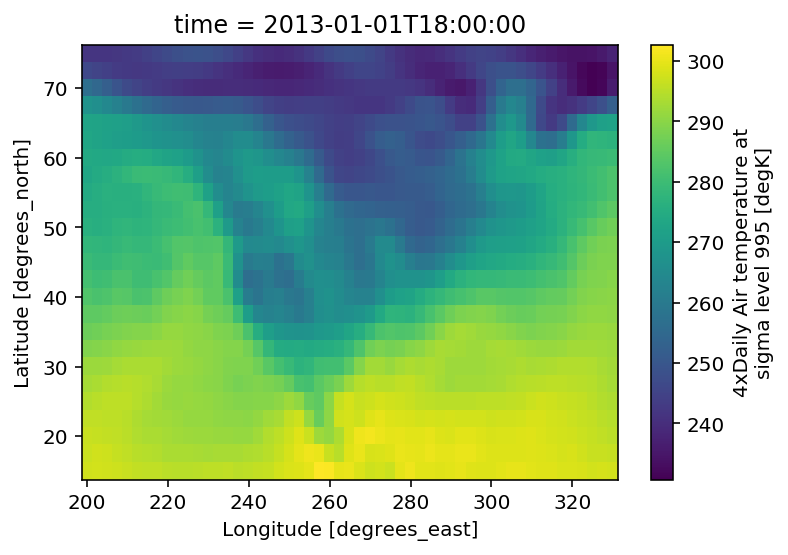

In [16]:
# xarray is able to plot the data right away, 
# and extracts labels from metadata
da_2d.plot()

You can see that [xarray]() automatically labels the plot axes and colorbar! Usually you would have to do this yourself.
This is possible by using the metadata provided in the netcdf.



Now lets experiment with a few common options for the `.plot()` function. For instance, I want to change the colormap

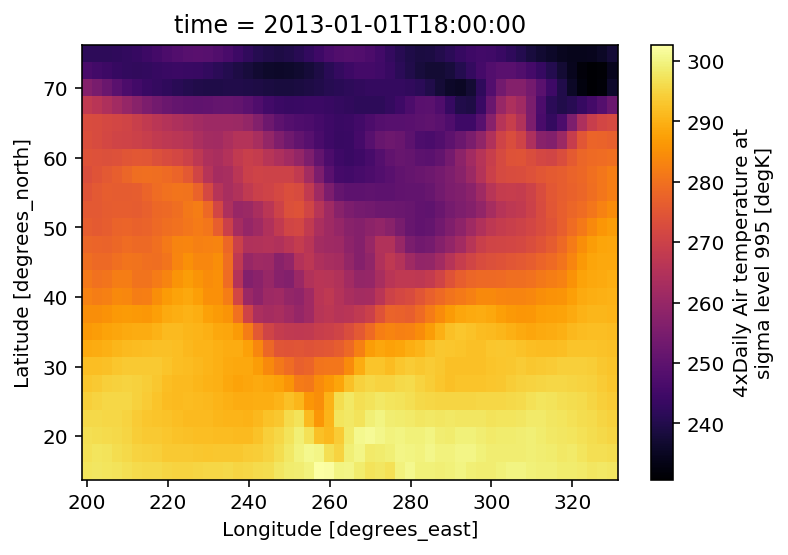

In [17]:
da_2d.plot(cmap='inferno')

That was easy! You can check out some more available colormaps [here](). 

Now lets change the limits of the colorbar to focus on the colder temperatures in North America:

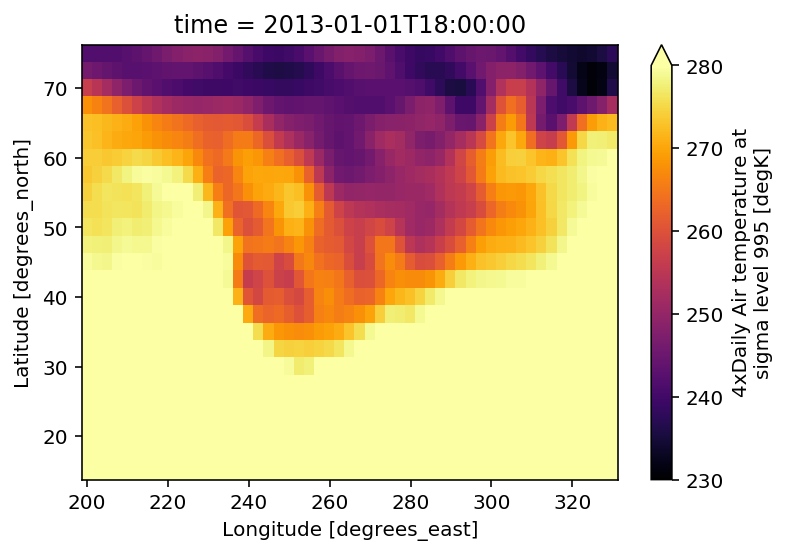

In [18]:
da_2d.plot(vmin=230,vmax=280, cmap='inferno') # the order of the arguments does not matter

As you can see, you loose detail in the warmer area, but gain detail in the colder regions. Adjust the color limits in your research to your specific problem.

Did you notice that it is quite difficult to read the actual value of temperature from the smooth colorbar?
We can divide the colorbar in less segments using the `levels` keyword:

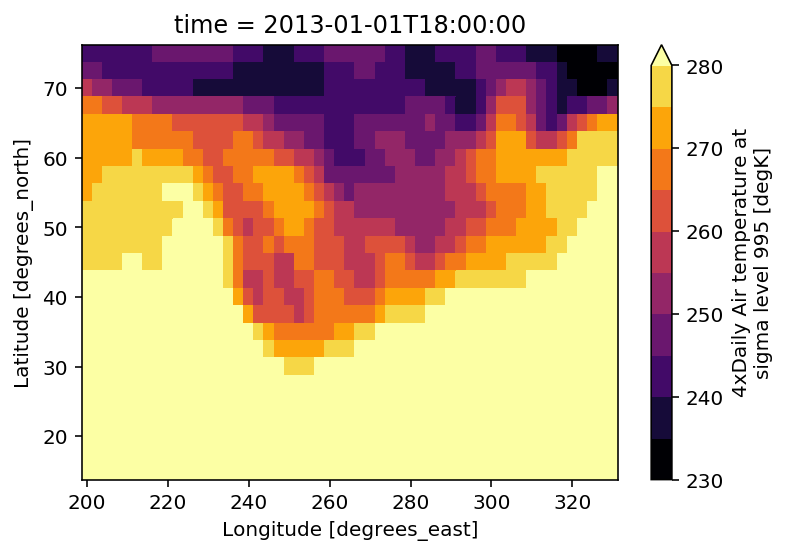

In [19]:
da_2d.plot(vmin=230,vmax=280,levels=11, cmap='inferno')

To make the presentation a bit more pleasing you could plot as filled contours instead of the pixels above.

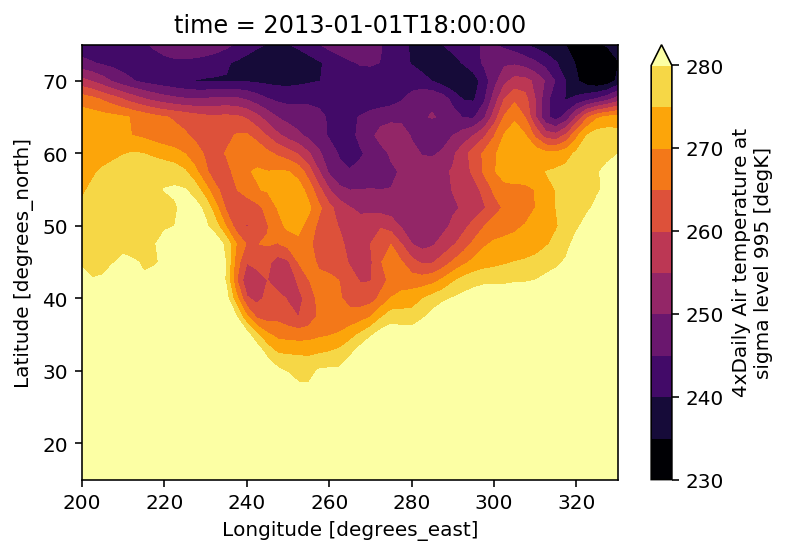

In [20]:
da_2d.plot.contourf(vmin=230,vmax=280,levels=11, cmap='inferno')

There are many more useful options in the plotting function of xarray. Press tab inside the function parenthesis to get help (this works with every python function), or visit the [xarray documentation](!!!) for many more examples.

### Map projections in xarray
This works very similarly to before (xarrays plotting is based on matplotlib after all).
Again the key is to add `projection=...` and `transform=...` options in the right location. 

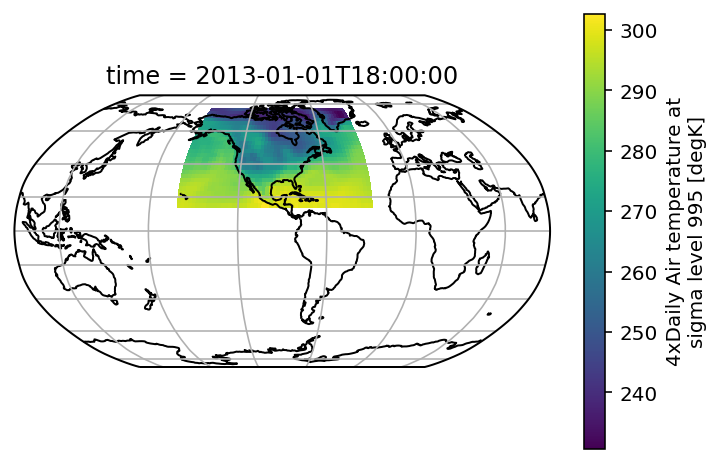

In [21]:
projection = ccrs.Robinson(central_longitude=-90) # the central longitude rotates the map to center on the US 
#Try out different projections


# Create an axis with the above projection
ax = plt.axes(projection=projection)
da_2d.plot(
    transform=ccrs.PlateCarree(), # Leave this the same for every plot
    x='lon', # Not necessary for this example but might be needed for other examples
    y='lat', 
          )

# this is the same syntax as before
ax.set_global() # show the full globe
ax.coastlines() # Add coastlines
ax.gridlines() # add gridlines to the plot

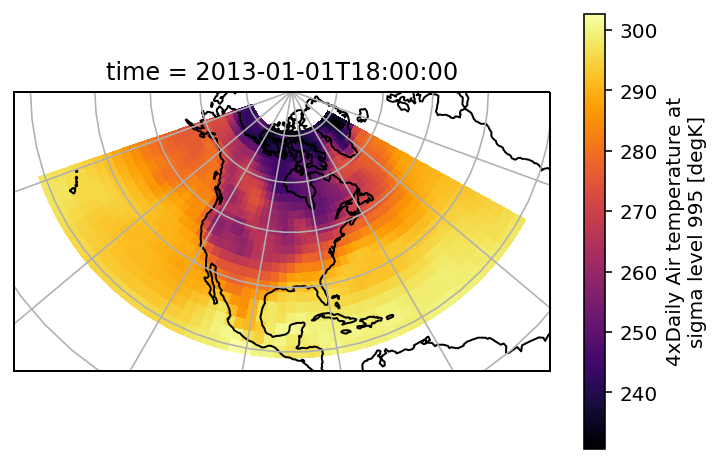

In [22]:
# with a different projection
projection = ccrs.NorthPolarStereo(-90) 

# Create an axis with the above projection
ax = plt.axes(projection=projection)
da_2d.plot(cmap='inferno',
           transform=ccrs.PlateCarree(), # Leave this the same for every plot
           x='lon', # Not necessary for this example but might be needed for other examples
           y='lat', 
          )
ax.coastlines()
ax.gridlines()

Not convinced that you should use xarray over the numpy/matplotlib version?

This example has really only scratched the surface, once you gain a bit more experience with python, xarray is able to achieve some pretty amazing things in an intuitive way.

Consider a more involved example (no need to understand everything now, this should just be an inspiration)

/Users/juliusbusecke/miniconda/envs/standard/lib/python3.6/site-packages/xarray/plot/facetgrid.py:365: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


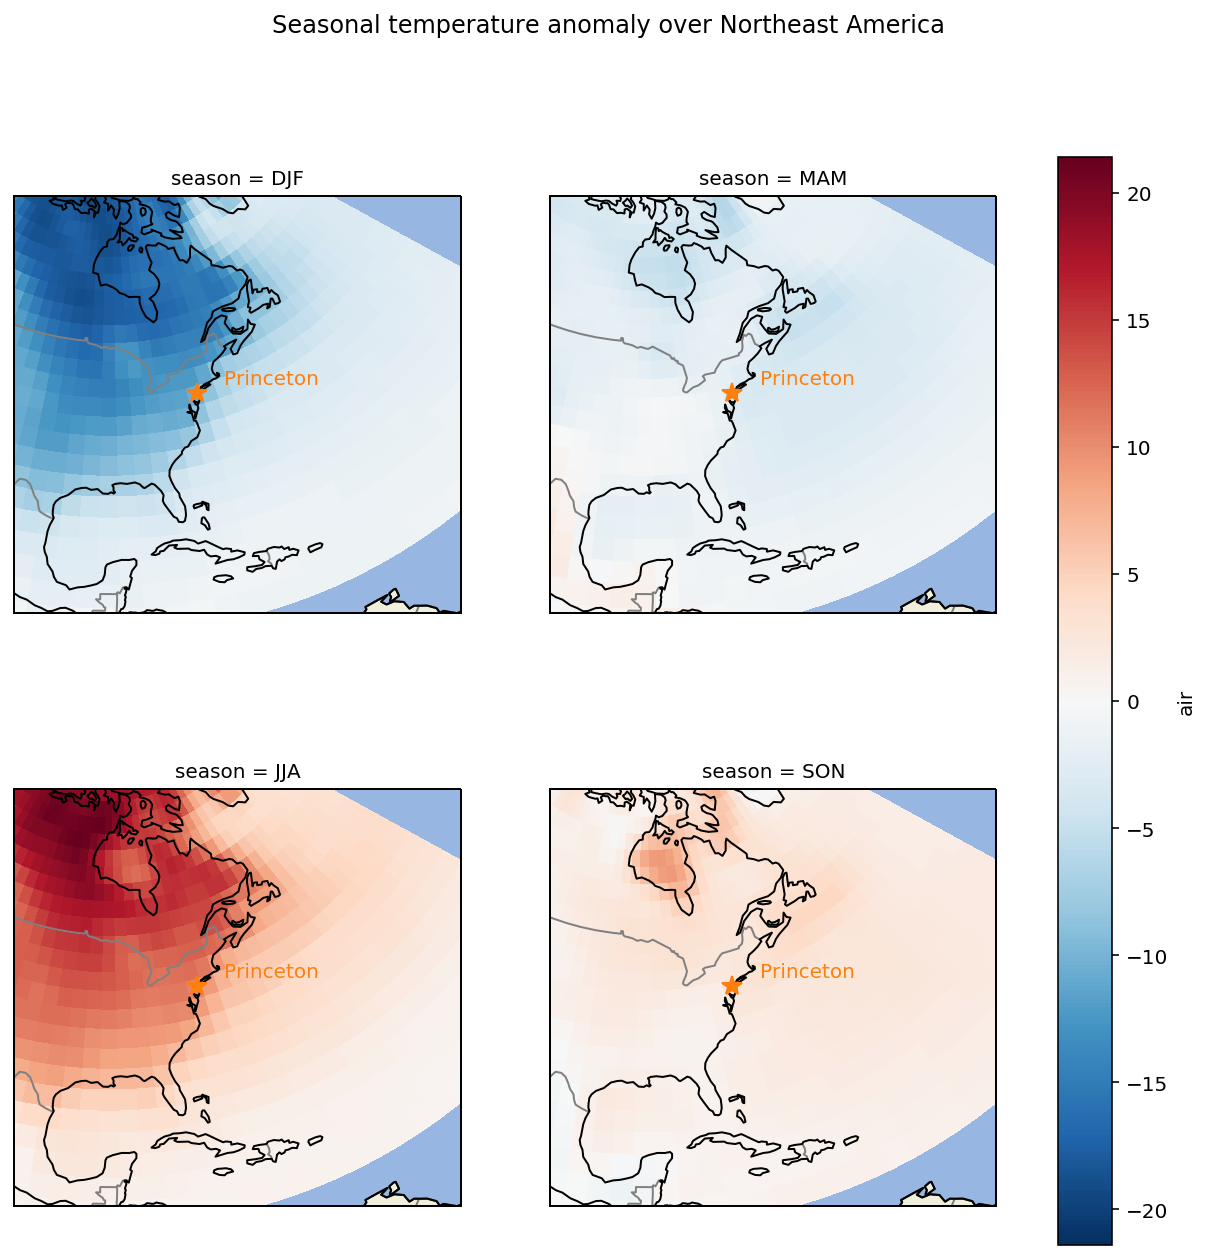

In [23]:
# Coordinates of princeton
princeton_lon,princeton_lat  = (360-74.6672,40.3573)


# import the features module from cartopy
import cartopy.feature as cfeature  
projection = ccrs.NorthPolarStereo(-90)

airtemp_seasonal = ds.groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],
                                                                              dims=['season']))
h = (airtemp_seasonal - airtemp_seasonal.mean('season')).plot(col='season',
                                                          col_wrap=2,
                                                          subplot_kws=dict(projection=projection),
                                                          transform=ccrs.PlateCarree(),
                                                          size=5, aspect=1,
                                                         )
for ax in h.axes.flat:
    ax.set_extent([-100, -50, 15,65])
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND, edgecolor='0.2')
    ax.add_feature(cfeature.BORDERS, edgecolor='0.5')
    ax.coastlines()
    # Highlight princeton as a star
    ax.plot(princeton_lon,princeton_lat, transform=ccrs.PlateCarree(), marker='*', markersize=10, color='C1')   
    ax.text(princeton_lon+5, princeton_lat, 'Princeton', color='C1', horizontalalignment='left', transform=ccrs.PlateCarree())

plt.suptitle('Seasonal temperature anomaly over Northeast America');

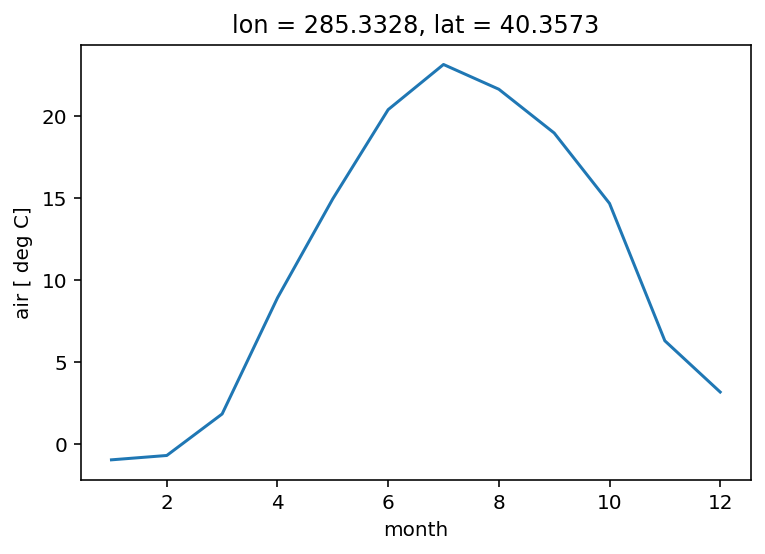

In [24]:
# What is the seasonal cycle in princteon
seasonal_cycle_princeton = ds.groupby('time.month').mean('time').interp(lon=princeton_lon, lat=princeton_lat)
# convert to celcius
seasonal_cycle_princeton = seasonal_cycle_princeton - 273.15
seasonal_cycle_princeton.attrs['units'] = ' deg C'

plt.figure()
seasonal_cycle_princeton.plot()

## Bonus: Interactive plotting

Matplotlib is an ideal tool for static plots (e.g. for presentations or publications)

...but there are also other powerful tools that enable to work with data interactively. 

Just a little teaser. Ask me if you want to find more about this.

In [ ]:
import hvplot.xarray, geoviews as gv

proj = ccrs.Orthographic(-90, 30)

ds.isel(time=slice(0, 9, 1)).hvplot.quadmesh(
    'lon', 'lat', projection=proj, project=True, global_extent=True,
    width=600, height=540, cmap='viridis', rasterize=True, dynamic=False,
) * gv.feature.coastline

## Sources and further Reading

- Ryan Abernatheys blog about [mapping with cartopy](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)

- Phil Elsons detailed [tutorial on map projections with cartopy](https://github.com/SciTools/cartopy-tutorial).

- [Wikipedia](https://en.wikipedia.org/wiki/Map_projection)